<a href="https://colab.research.google.com/github/TsTarK85/Basic-AI-ML-Projects/blob/main/gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [5]:
gold_dataset = pd.read_csv('/content/gld_price_data.csv')
gold_dataset.head()
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [4]:
gold_dataset.shape

(2290, 6)

In [6]:
# Getting basic info of the data
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_dataset.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [8]:
# getting statistical measure of the data
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
# Finding correlation either positive or negative
gold_dataset['Date'] = pd.to_datetime(gold_dataset['Date'])

correlation = gold_dataset[['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']].corr()

<Axes: >

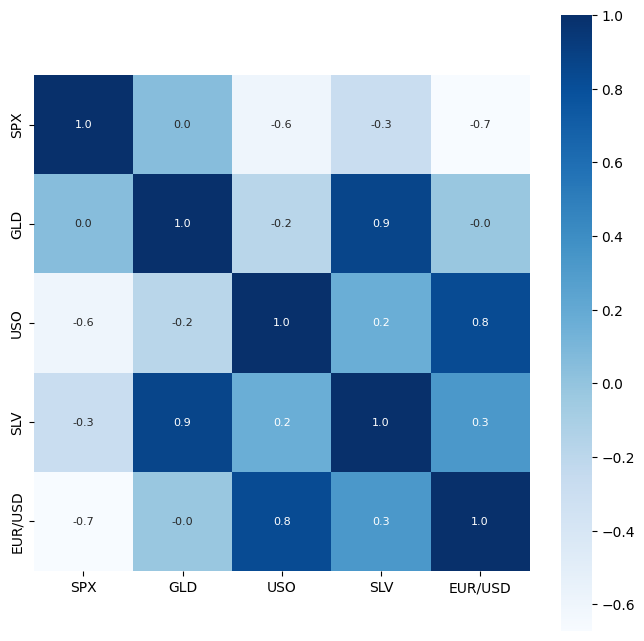

In [15]:
# Constructing heatmap to understand the correlation
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap="Blues")

In [16]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


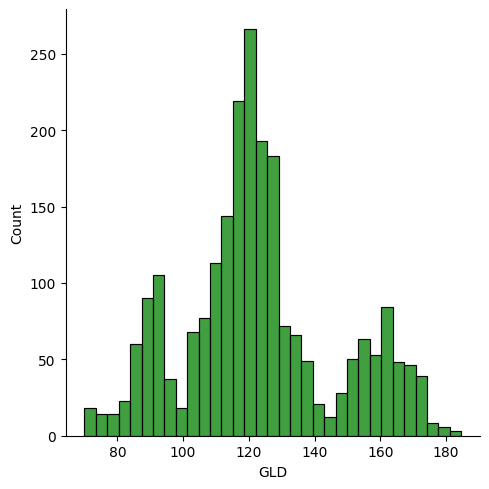

In [17]:
sns.displot(gold_dataset['GLD'], color='green')

In [19]:
x = gold_dataset.drop(['Date', 'GLD'], axis=1)
y = gold_dataset['GLD']
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2, test_size=0.2)

In [21]:
# Random Forest Model Implementation
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [22]:
test_data_predict = regressor.predict(x_test)
print(test_data_predict)

[168.62919925  82.19129984 115.92000001 127.68020099 120.85260135
 154.7031976  150.18859829 126.1781002  117.51629872 125.88320079
 116.55830133 172.1189009  141.14699805 167.97489897 115.38969985
 117.66960059 138.93070264 169.66690069 158.88540331 158.67629904
 155.20230017 125.01599999 175.98049923 157.23250427 125.12820018
  93.8096994   76.98480056 120.22129995 119.1706996  167.48149932
  88.18950042 125.24299995  91.0307009  117.78240007 121.10669947
 136.17190084 115.44550152 114.96850062 149.21399951 107.45880062
 104.37880271  87.11919754 126.40420064 118.30259989 153.04729902
 119.62830005 108.32370008 108.12309819  93.14170088 127.1063977
  74.98560032 113.68969901 121.21780041 111.25389918 118.90649889
 120.4546993  159.26390052 167.36410021 146.93649639  85.79549861
  94.22850031  86.87339888  90.65099995 119.10950037 126.44230081
 127.52250028 168.95629907 122.1450995  117.32069909  98.28880002
 168.49950136 142.92389767 131.88890293 121.23770235 121.02769907
 119.713700

In [23]:
error = metrics.r2_score(y_test, test_data_predict)
print(error)

0.9898069851321633


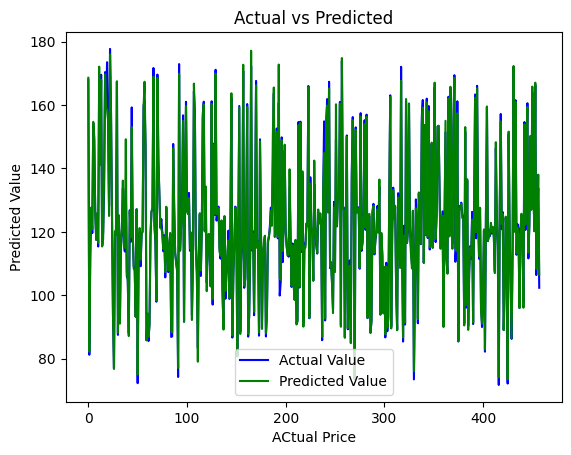

In [25]:
y_test = list(y_test)
plt.plot(y_test, color='blue', label = "Actual Value")
plt.plot(test_data_predict, color='green', label="Predicted Value")
plt.title("Actual vs Predicted")
plt.xlabel("ACtual Price")
plt.ylabel("Predicted Value")
plt.legend()
plt.show()